In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from itertools import product

from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class PolynomialRegression:
    
    def __init__(self, degree = 2):
        self.degree = degree
        
    def _make_poly_features(self, X):
            cols = X.columns
            num_variables = len(cols)
            X_poly = pd.DataFrame()

            index = list(range(len(X)))

            count = 0
            X_poly.index = index
            coefficient_combinations = product(range(self.degree + 1), repeat=num_variables)

            for combo in coefficient_combinations:
                if sum(combo) <= self.degree and sum(combo) > 0:
                    name = ""
                    col = np.ones(len(X))
                    for i in range(num_variables):
                        if combo[i] > 0:
                            name += cols[i] + "^" + str(combo[i]) + "*"
                            col *= X[cols[i]]**combo[i]
                    name = name[:-3]
                    col = pd.Series(col)
                    col.index = index
                    col.name = str(name)
                    count += 1
                    X_poly = pd.concat([X_poly, col], axis=1)

            return X_poly
        
    def _error(self, y, y_pred):
        diff = y-y_pred
        reg = 0.
        if (self.reg == "L1"):
            reg = np.sum(np.abs(self.weights))*self.lambda_
        if (self.reg == "L2"):
            reg = np.sum(self.weights**2)*self.lambda_
        return np.sum(diff**2)/(2*len(y))+reg
    
    def transform_fit(self, x, y, learning_rate = 0.1, regularization = "None", epochs = 1000, _lambda = 1):
        
        x = self._make_poly_features(x)
        
        self.reg = regularization
        
        self.bias = 0
        
        self.lambda_ = _lambda
        
        self.weights = np.zeros(x.shape[1])
        
        self.learning_rate = learning_rate

        losses =[]

        n = x.shape[0]
        for epoch in range(epochs):
            y_hat = np.dot(x, self.weights)+self.bias
            diff = y-y_hat
            if (self.reg == "L1"):
                sign = np.where(self.weights > 0, 1, -1)
                gradient = np.dot(x.T, diff) * \
                    self.learning_rate/n + sign*self.lambda_/n
            elif (self.reg == "L2"):
                gradient = np.dot(x.T, diff)*self.learning_rate / \
                    n + self.lambda_*2*self.weights/n
            else:
                gradient = np.dot(x.T, diff)*self.learning_rate/n
            self.weights += gradient
            grad_b = np.sum(diff)*self.learning_rate/n
            self.bias += grad_b
            losses.append(self._error(y, y_hat))
            print(f"epoch : {epoch+1}, loss: ", self._error(y, y_hat))
            
        self.losses = losses
        
    def predict(self, x):
        
        x = self._make_poly_features(x)
        
        return np.dot(x, self.weights)+self.bias
    
    def loss_plot(self):
        x = list(range(1,len(self.losses)+1))
        y = self.losses
        plt.plot(x, y)
        plt.show()

In [3]:
def standardize(column):
    return (column - column.mean()) / column.std()

def apply(X):
    cols=list(X)
    for i in cols:
        X[i]=standardize(X[i])

In [4]:
df = pd.read_csv("synthetic_dataset.csv")

df.drop("Unnamed: 0", axis = 1, inplace= True)

X = df.drop("Outcome", axis = 1)
y = df['Outcome']

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,149,96,19,10,38.387409,0.561331,40,1
1,0,151,44,6,105,26.125923,0.463959,27,1
2,3,169,57,24,240,33.224573,0.541364,36,0
3,4,86,61,35,0,32.918264,0.526311,39,0
4,6,75,62,31,77,37.453830,0.178734,21,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [6]:
apply(X_train)
apply(X_test)

In [7]:
pr = PolynomialRegression(degree = 2)

### No regularisation

In [8]:
pr.transform_fit(X_train, y_train, learning_rate= 0.01, regularization="None", epochs=1000, _lambda= 0.01)

epoch : 1, loss:  0.17125
epoch : 2, loss:  0.15741784888301916
epoch : 3, loss:  0.1469417848297461
epoch : 4, loss:  0.1389716466877564
epoch : 5, loss:  0.13287382462735303
epoch : 6, loss:  0.12817604992626846
epoch : 7, loss:  0.12452626327972852
epoch : 8, loss:  0.12166197148535096
epoch : 9, loss:  0.11938741788231183
epoch : 10, loss:  0.11755657398278477
epoch : 11, loss:  0.11606046785896677
epoch : 12, loss:  0.11481774339619659
epoch : 13, loss:  0.11376762653578096
epoch : 14, loss:  0.11286468472756025
epoch : 15, loss:  0.11207492233161112
epoch : 16, loss:  0.11137287131361046
epoch : 17, loss:  0.11073942344789049
epoch : 18, loss:  0.11016021495904528
epoch : 19, loss:  0.10962442274630316
epoch : 20, loss:  0.10912386725334386
epoch : 21, loss:  0.10865234380515178
epoch : 22, loss:  0.10820512416865423
epoch : 23, loss:  0.1077785849454289
epoch : 24, loss:  0.10736993046905827
epoch : 25, loss:  0.10697698612254936
epoch : 26, loss:  0.1065980441321247
epoch : 27,

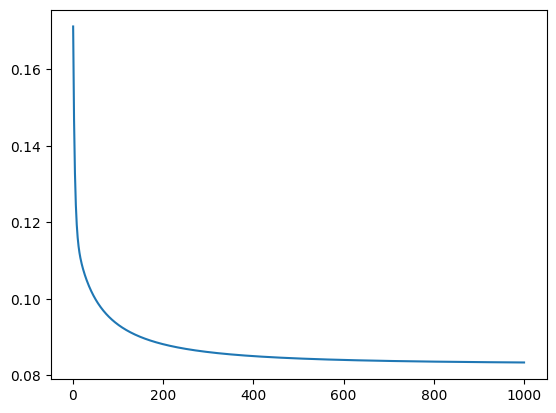

In [9]:
pr.loss_plot()

In [10]:
y_pred = pr.predict(X_test)

y_pred = [1 if i > 0.5 else 0 for i in y_pred]

print(f"Accuracy is: {accuracy_score(y_test, y_pred)}")

Accuracy is: 0.76


### L1

In [11]:
pr.transform_fit(X_train, y_train, learning_rate= 0.01, regularization="L1", epochs=1000, _lambda= 0.01)


epoch : 1, loss:  0.17178375516791297
epoch : 2, loss:  0.15854726105947786
epoch : 3, loss:  0.14836006600250046
epoch : 4, loss:  0.140670176646112
epoch : 5, loss:  0.13483796375531862
epoch : 6, loss:  0.13038778733561077
epoch : 7, loss:  0.12696685932219068
epoch : 8, loss:  0.12431253959796387
epoch : 9, loss:  0.12223345246710778
epoch : 10, loss:  0.12058235177780358
epoch : 11, loss:  0.11924776225799719
epoch : 12, loss:  0.11815103909536313
epoch : 13, loss:  0.11723289073561426
epoch : 14, loss:  0.1164493146906616
epoch : 15, loss:  0.11576766186969313
epoch : 16, loss:  0.11516541270179188
epoch : 17, loss:  0.11462875898383096
epoch : 18, loss:  0.11413908808897463
epoch : 19, loss:  0.11369142511212853
epoch : 20, loss:  0.11327114298610183
epoch : 21, loss:  0.11287467733455343
epoch : 22, loss:  0.11249795373401213
epoch : 23, loss:  0.11213791154896638
epoch : 24, loss:  0.11179223978560174
epoch : 25, loss:  0.11145918147452151
epoch : 26, loss:  0.1111373889268704

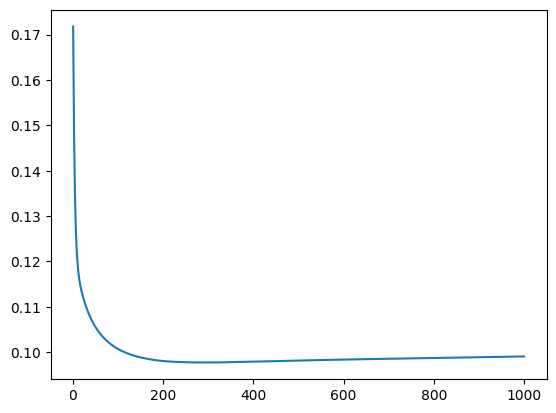

In [12]:
pr.loss_plot()

In [13]:
y_pred = pr.predict(X_test)

y_pred = [1 if i > 0.5 else 0 for i in y_pred]

print(f"Accuracy is: {accuracy_score(y_test, y_pred)}")

Accuracy is: 0.75


### L2

In [14]:
pr.transform_fit(X_train, y_train, learning_rate= 0.01, regularization="L2", epochs=1000, _lambda= 0.01)

epoch : 1, loss:  0.171251362504153
epoch : 2, loss:  0.157422603331797
epoch : 3, loss:  0.14695064277736164
epoch : 4, loss:  0.13898507997266213
epoch : 5, loss:  0.13289210492213535
epoch : 6, loss:  0.1281992891740636
epoch : 7, loss:  0.12455445121640853
epoch : 8, loss:  0.12169500843577995
epoch : 9, loss:  0.11942514222573676
epoch : 10, loss:  0.1175987843786084
epoch : 11, loss:  0.1161069406934669
epoch : 12, loss:  0.11486824607618057
epoch : 13, loss:  0.11382192729799927
epoch : 14, loss:  0.1129225596058542
epoch : 15, loss:  0.11213615986098195
epoch : 16, loss:  0.11143727547259401
epoch : 17, loss:  0.11080681526027769
epoch : 18, loss:  0.11023043310009067
epoch : 19, loss:  0.1096973234306137
epoch : 20, loss:  0.10919932362298763
epoch : 21, loss:  0.10873024498725371
epoch : 22, loss:  0.10828537413123049
epoch : 23, loss:  0.10786110124749108
epoch : 24, loss:  0.1074546429750113
epoch : 25, loss:  0.10706383573053858
epoch : 26, loss:  0.10668698155026525
epoch

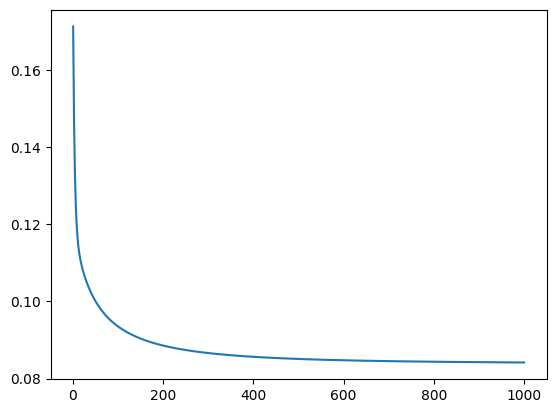

In [15]:
pr.loss_plot()

In [16]:
y_pred = pr.predict(X_test)

y_pred = [1 if i > 0.5 else 0 for i in y_pred]

print(f"Accuracy is: {accuracy_score(y_test, y_pred)}")

Accuracy is: 0.76


## Final classification report

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        72
           1       0.58      0.50      0.54        28

    accuracy                           0.76       100
   macro avg       0.70      0.68      0.69       100
weighted avg       0.75      0.76      0.75       100



In [18]:
def my_classification_report(y_actual, y_pred):
    
    y_actual = y_actual.tolist()
    
    assert len(y_actual) == len(y_pred)
    classes = []
    for i in y_actual:
        if i not in classes:
            classes.append(i)
    
    total_tp = 0
    total_tn = 0
    total_fp = 0
    total_fn = 0
    
    report = {}    
    for class_label in classes:
        class_dict = {
            "tp":0,
            "fp":0,
            "tn":0,
            "fn":0
        }
        for i in range(len(y_actual)):
            actual, predicted = y_actual[i], y_pred[i]
            if actual == class_label and predicted == class_label:
                class_dict["tp"] += 1
                total_tp += 1
            elif actual != class_label and predicted == class_label:
                class_dict["fp"] += 1
                total_fp += 1
            elif actual == class_label and predicted != class_label:
                class_dict["fn"] += 1
                total_fn += 1
            else:
                class_dict["tn"] += 1
                total_tn += 1
        
            report[class_label] = class_dict


    final_report = {}
    
    for class_label, metrics in report.items():
        
        precision = round(metrics["tp"]/(metrics["tp"] + metrics["fp"]), 2)
        recall = round(metrics["tp"]/(metrics["tp"] + metrics["fn"]), 2)
        f1 = round(2 * precision * recall / (precision + recall), 2)
        final_report[class_label] = {
            "precision": precision,
            "recall": recall,
            "f1 score": f1
        }
    
    header = f"\tprec\trecall\tf1\n\n"
    
    data  = ""
    
    for class_label, metrics in final_report.items():
        data += f"{class_label}\t{metrics['precision']}\t{metrics['recall']}\t{metrics['f1 score']}\n"
        
    footer = f"\tOverall accuracy: {round((total_tp+total_tn)/(total_tp+total_tn+total_fn+total_fp), 2)}"
    
    return header + data + footer              

In [19]:
print(my_classification_report(y_test, y_pred))

	prec	recall	f1

0	0.82	0.86	0.84
1	0.58	0.5	0.54
	Overall accuracy: 0.76
